# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<br/>
<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

<br/>
<center><i><b>
Atenção: não são autorizadas cópias, divulgações ou qualquer tipo de uso deste material sem o consentimento prévio dos autores.
</center></i></b>
<br/>

# <center>Exercício - Metodologia Experimental</center>

Este exercício abordará metodologia experimental e análise de desempenho. Para isso, empregaremos uma regressão logística para comparar o desempenho usando holdout (treino, validação e teste) e validação cruzada *k*-fold, com medidas de acurácia, precisão, revocação e F-medida. Adicionalmente, iremos implementar busca em grade para encontrar o melhor parâmetro de regularização da regressão logística. Por fim, vamos plotar curvas de aprendizado para avaliar se o método está sofrendo de over/under fitting.

## Parte 1: Holdout

Inicialmente, vamos implementar a validação holdout estratificada.

Primeiro, vamos carregar a base de dados e visualizar.

In [1]:
# -*- coding: utf-8 -*-

# Importando a biblioteca matplotlib
import matplotlib.pyplot as plt

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes e análise de dados

# Importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'data.csv', sep=',', index_col=None)

# Pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_dataset.iloc[:, 0:-1].values 

# Pega os valores da última coluna e guarda em um vetor Y
Y = df_dataset.iloc[:, -1].values 

# Imprime as 5 primeiras linhas da matriz X
display('X:', X[0:5,:])

# Imprime os 5 primeiros valores de Y
print('Y:', Y[0:5])

# obtem e imprimi as classes do problema
classes = np.unique(Y)
print('\nClasses: ', classes)

# Função para plotar os dados
import matplotlib.pyplot as plt

def visualizarDados(X,Y):
    """
    Função usada para plotar os dados
    """
    
    # definindo o tamanho da figura 
    plt.figure(figsize=(10,8))
    
    # plota os dados da classe 0
    plt.scatter( X[Y==0,0], X[Y==0,1], label='Classe 0', color='blue', s=50, edgecolors='k') 
    
    # plota os dados da classe 1
    plt.scatter( X[Y==1,0], X[Y==1,1], label='Classe 1', color='red', s=50, edgecolors='k') 
        
    # Plota a legenda
    plt.legend()
    
# Efetua o plot
visualizarDados(X,Y)
plt.show()

'X:'

array([[0.093318 , 0.649854 ],
       [0.0979263, 0.705409 ],
       [0.15553  , 0.784357 ],
       [0.210829 , 0.866228 ],
       [0.328341 , 0.929094 ]])

Y: [1 1 1 1 1]

Classes:  [0 1]


<Figure size 1000x800 with 1 Axes>

A validação holdout estratificada consiste em dividir a base de dados em duas partições (treino e teste), mantendo a distribuição original de dados de cada classe em cada partição.

Você precisará completar a função `stratified_holdOut()`. A função que você irá implementar deverá retornar os índices dos dados de treinamento e os índices dos dados de teste. Os primeiros $p\%$ dos dados de cada classe devem compor o conjunto de treinamento, enquanto o restante deve compor os dados de teste.

In [2]:
def stratified_holdOut(target, pTrain):
    """
    Retorna os indices dos dados de treinamento e teste 
    
    Parâmetros
    ----------   
    target: vetor com as classes dos dados
    
    pTrain: porcentagem de dados de treinamento
    
    Retorno
    -------
    train_index: índices dos dados de treinamento 
    test_index: índices dos dados de teste 
    
    """
    
    # inicializa as variaveis que precisam ser retornadas 
    train_index = []
    test_index = []

    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instruções: Complete o codigo para retornar os índices dos dados de  
    #              treinamento e dos dados de teste.
    #              
    #              Obs: - os conjuntos de treinamento e teste devem ser criados
    #                     de maneira estratificada, ou seja, deve ser mantida a 
    #                     a distribuição original dos dados de cada classe em cada 
    #                     conjunto. Em outras palavras, o conjunto de treinamento deve ser
    #                     formado por pTrain% dos dados da primeira classe, pTrain% dos dados da 
    #                     segunda classe e assim por diante. 
    #                   - a porcentagem de dados de teste para cada classe é igual a 
    #                     1-pTrain (parametro da funcao que contem a porcentagem de dados 
    #                     de treinamento)
    
    #Versão p/ 2 classes full vetorizada
    #train_index = (sorted(sum(np.argwhere(target == 1)[:int(len(np.argwhere(target == 1))*pTrain)].tolist(),[]) + sum(np.argwhere(target == 0)[:int(len(np.argwhere(target == 0))*pTrain)].tolist(),[])))
    #test_index = (sorted(sum(np.argwhere(target == 1)[int(len(np.argwhere(target == 1))*pTrain): (int(len(np.argwhere(target == 1))*pTrain) + int(len(np.argwhere(target == 1))*((100 - pTrain*100)/100)))].tolist(),[]) + sum(np.argwhere(target == 0)[int(len(np.argwhere(target == 0))*pTrain):(int(len(np.argwhere(target == 0))*pTrain) + int(len(np.argwhere(target == 0))*((100 - pTrain*100)/100)))].tolist(),[])))
    
    #Versão p/ N classes
    for classe in np.unique(target).tolist():
        idxClasse = np.argwhere(target == classe)
        idxTrain  = int(len(idxClasse) * pTrain)
        
        train_index += sum(idxClasse[:idxTrain].tolist(), []) 
        test_index  += sum(idxClasse[idxTrain:].tolist(), [])
        
    train_index = sorted(train_index)
    test_index  = sorted(test_index)
    ##################################################################################
    
    return train_index, test_index

É importante que as partições de treinamento e teste sejam geradas de forma aleatória. Portanto, no script abaixo, antes de chamarmos a função que gera os conjuntos de treinamento e teste, iremos embaralhar os dados. Para que toda a execução gere o mesmo resultado, vamos usar uma semente para a função de geração de números aleatórios. 

In [3]:
# semente usada na randomizacao dos dados.
randomSeed = 10 

# gera os indices aleatorios que irao definir a ordem dos dados
idx_perm = np.random.RandomState(randomSeed).permutation(range(len(Y)))

# ordena os dados de acordo com os indices gerados aleatoriamente
X2, Y2 = X[idx_perm, :], Y[idx_perm]

# define a porcentagem de dados que irao compor o conjunto de treinamento
pTrain = 0.8 

# obtem os indices dos dados da particao de treinamento e da particao de teste
train_index, test_index = stratified_holdOut(Y2, pTrain)

X_train, X_test = X2[train_index, :], X2[test_index, :];
Y_train, Y_test = Y2[train_index], Y2[test_index];

print('Qtd. dados de treinamento: %d (%1.2f%%)' %(X_train.shape[0], (X_train.shape[0]/X.shape[0])*100) )
print('Qtd. de dados de teste: %d (%1.2f%%)' %(X_test.shape[0], (X_test.shape[0]/X.shape[0])*100) )

# imprime a porcentagem de dados de treinamento de cada classe
print("\nQtd. de dados de cada classe (treinamento)")
cTrain, counts_cTrain = np.unique(np.sort(Y_train), return_counts=True)
for i in range( len(cTrain) ):
    print('\tClasse %s: %d (%1.2f%%)' %( cTrain[i],counts_cTrain[i],(counts_cTrain[i]/len(Y_train))*100 ) )

# imprime a porcetagem de dados de teste de cada classe
print("\nQtd. de dados de cada classe (teste)")
cTest, counts_cTest = np.unique(np.sort(Y_test), return_counts=True)
for i in range( len(cTrain) ):
    print('\tClasse %s: %d (%1.2f%%)' %( cTest[i],counts_cTest[i],(counts_cTest[i]/len(Y_test))*100 ) )

# imprime os indices dos 10 primeiros dados de treinamento 
print("\nClasses dos 20 primeiros dados de treinamento")
print(Y_train[0:20])
    
# imprime os indices dos 10 primeiros dados de teste 
print("\nClasses dos 20 primeiros dados de teste")
print(Y_test[0:20])
    
print('\n\n'+"-"*80+'\nSe sua implementacao estiver correta: ')
print('\t- O conjunto de treinamento deve conter 688 dados (80.00%)')
print('\t- O conjunto de teste deve conter 172 dados (20.00%)')

print('\nSe sua implementacao estiver correta, o conjunto de treinamento deve conter: ')
print('\t- 304 dados da classe 0 (44.19%)')
print('\t- 384 dados da classe 1 (55.81%)')

print('\nSe sua implementacao estiver correta, o conjunto de teste deve conter: ')
print('\t- 76 dados da classe 0 (44.19%)')
print('\t- 96 dados da classe 1 (55.81%)')

print('\nSe sua implementacao estiver correta, as classes dos 20 primeiros dados de treinamento devem ser: ')
print('[1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1]')

print('\nSe sua implementacao estiver correta, as classes dos 20 primeiros dados de teste devem ser: ')
print('[1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1]')

Qtd. dados de treinamento: 688 (80.00%)
Qtd. de dados de teste: 172 (20.00%)

Qtd. de dados de cada classe (treinamento)
	Classe 0: 304 (44.19%)
	Classe 1: 384 (55.81%)

Qtd. de dados de cada classe (teste)
	Classe 0: 76 (44.19%)
	Classe 1: 96 (55.81%)

Classes dos 20 primeiros dados de treinamento
[1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1]

Classes dos 20 primeiros dados de teste
[1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1]


--------------------------------------------------------------------------------
Se sua implementacao estiver correta: 
	- O conjunto de treinamento deve conter 688 dados (80.00%)
	- O conjunto de teste deve conter 172 dados (20.00%)

Se sua implementacao estiver correta, o conjunto de treinamento deve conter: 
	- 304 dados da classe 0 (44.19%)
	- 384 dados da classe 1 (55.81%)

Se sua implementacao estiver correta, o conjunto de teste deve conter: 
	- 76 dados da classe 0 (44.19%)
	- 96 dados da classe 1 (55.81%)

Se sua implementacao estiver correta, as classes dos

Agora que separamos os dados em duas partições, podemos treinar um método de classicação na partição de treinamento e testar na partição de teste. Para isso, vamos usar a Regressão Logística, cujo código está na pasta raíz desse exercício. Como os dados não são linearmente separáveis, no script abaixo, antes de treinar a Regressão Logística, são adicionados atributos polinomiais nos dados.

In [4]:
# executa o arquivo que contém as função da regressao logística
%run logisticRegression.py

# adiciona novas colunas que correspondem a atributos polinomiais
Xpol_train = atributosPolinomiais(X_train[:,0],X_train[:,1]) 
print('Dimensão do novo conjunto de dados polinomiais (treino): \n', Xpol_train.shape)

Xpol_test = atributosPolinomiais(X_test[:,0],X_test[:,1]) 
print('\nDimensão do novo conjunto de dados polinomiais (teste): \n', Xpol_test.shape)

# Configura o parametro regularizacao lambda igual a 1
lambda_reg = 1
        
# Configura o numero de interacaoes da regressao
iteracoes = 1000

# executa o treinamento e obtém os valores de theta usando regressão logística (arquivo logisticRegression.py)
theta = treinamento(Xpol_train, Y_train, lambda_reg, iteracoes)
  
# classifica os dados de teste
Y_pred = predicao(Xpol_test, theta)
        
print('\nPredição obtida para as 20 primeiras amostras de teste:\n', Y_pred[0:20])

print('\n\nSe sua implementacao estiver correta, as predicoes obtidas para as 20 primeiras amostras de teste foram:')
print('[1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0]')

Dimensão do novo conjunto de dados polinomiais (treino): 
 (688, 28)

Dimensão do novo conjunto de dados polinomiais (teste): 
 (172, 28)

Predição obtida para as 20 primeiras amostras de teste:
 [1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.]


Se sua implementacao estiver correta, as predicoes obtidas para as 20 primeiras amostras de teste foram:
[1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0]


### Matriz de confusão

Agora que treinamos o método de classificação, precisamos avaliar o seu desempenho. A maioria das medidas de desempenho pode ser calculada a partir da matriz de confusão. A Tabela 1 apresenta um exemplo de matriz de confusão para um problema com duas classes: **pos** e **neg**. 

 <table style="text-align:center">
  <tr>
    <th> </th>
    <th>Predição = pos</th>
    <th>Predição = neg</th>
  </tr>
  <tr>
    <td><b>Classe = pos</b></td>
    <td>vp</td>
    <td>fn</td>
  </tr>
  <tr>
      <td><b>Classe = neg</b></td>
    <td>fp</td>
    <td>vn</td>
  </tr>
</table> 
<br/>
<center><em>Tabela 1. Exemplo de matriz de confusão para um problema binário.</em></center>

A partir da matriz de confusão mostrada acima, podemos coletar os seguintes valores:

* **verdadeiros positivos (vp)**: quantidade de exemplos corretamente classificados como pertencentes à classe positiva.
* **falsos positivos (fp)**: quantidade de exemplos incorretamente classificados como pertencentes à classe positiva.
* **verdadeiros negativos (vn)**: quantidade de exemplos corretamente classificados como pertencentes à classe negativa.
* **falsos negativos (fn)**: quantidade de exemplos incorretamente classificados como pertencentes à classe negativa.

A matriz de confusão apresentada na Tabela 1 pode ser facilmente estendida para problemas multiclasse. Para um problema de $|C|$ classes, a matriz de confusão terá dimensão $|C|x|C|$ e pode ser representada conforme mostra a Tabela 2.

 <table>
  <tr style="text-align:center">
    <th> </th>
    <th style="text-align:center">Predição = $c_1$</th>
    <th style="text-align:center">Predição = $c_2$</th>
    <th style="text-align:center">$\dots$</th>
    <th style="text-align:center">Predição = $c_{|C|}$</th>
  </tr>
  <tr style="text-align:center">
    <td style="text-align:center"><b>Classe = $c_1$</b></td>
    <td style="text-align:center">$k_{11}$</td>
    <td style="text-align:center">$k_{12}$</td>
    <td style="text-align:center">$\dots$</td>
    <td style="text-align:center">$k_{1|C|}$</td>
  </tr>
  <tr style="text-align:center">
    <td style="text-align:center"><b>Classe = $c_2$</b></td>
    <td style="text-align:center">$k_{21}$</td>
    <td style="text-align:center">$k_{22}$</td>
    <td style="text-align:center">$\dots$</td>
    <td style="text-align:center">$k_{2|C|}$</td>
  </tr>
  <tr style="text-align:center">
    <td style="text-align:center"><b>$\vdots$</b></td>
    <td style="text-align:center">$\vdots$</td>
    <td style="text-align:center">$\vdots$</td>
    <td style="text-align:center">$\ddots$</td>
    <td style="text-align:center">$\vdots$</td>
  </tr>
  <tr style="text-align:center">
    <td style="text-align:center"><b>Classe = $c_n$</b></td>
    <td style="text-align:center">$k_{|C|1}$</td>
    <td style="text-align:center">$k_{|C|2}$</td>
    <th style="text-align:center">$\dots$</th>
    <td style="text-align:center">$k_{|C||C|}$</td>
  </tr>
</table> 
<br/>
<center><em>Tabela 2. Exemplo de matriz de confusão para um problema multiclasse.</em></center>

A quantidade de **vp**, **vn**, **fp** e **fn** em relação a uma classe $c_j$, usando-se os valores apresentados na matriz de confusão (Tabela 2), pode ser calculada da seguinte forma:

* $\text{vp}_j=k_{jj}$: quantidade de exemplos corretamente classificados como pertencentes à classe $c_j$;

* $\text{fp}_j=\sum_{p=1|p\neq j}^{{|\mathcal{C}|}} k_{pj}$: quantidade de exemplos incorretamente classificados como pertencentes à classe $c_j$; 
 
* $\text{vn}_j=\sum_{i=1|i\neq j}^{{|\mathcal{C}|}} \sum_{p=1|p\neq j}^{{|\mathcal{C}|}} k_{pi}$: quantidade de exemplos corretamente classificados como não pertencentes à classe $c_j$; 

* $\text{fn}_j=\sum_{p=1|p\neq j}^{{|\mathcal{C}|}} k_{jp}$: quantidade de exemplos da classe $c_j$ incorretamente classificados como pertencentes a outra classe. 

Outra maneira de calcular **vp**, **vn**, **fp** e **fn** para uma classe $c_j$ em um problema multiclasse é gerar uma matriz de confusão binária onde $c_j$ é considerada a classe positiva e todas as outras são consideradas uma única classe negativa.

Agora, você precisa gerar a matriz de confusão a partir dos resultados obtidos. A matriz de confusão precisa ter dimensão $|C|x|C|$.

In [5]:
def get_confusionMatrix(Y_test, Y_pred, classes):
    """
    Retorna a matriz de confusao, onde o numero de linhas e 
        e numero de colunas e igual ao numero de classes
        
    Parametros
    ----------   
    Y_test: vetor com as classes verdadeiras dos dados
    
    Y_pred: vetor com as classes preditas pelo metodo de classificacao
    
    classes: classes do problema
    
    
    Retorno
    -------
    cm: matriz de confusao (array numpy, em que o numero de linhas e de colunas
        e igual ao numero de classes)
    
    """
    
    # inicia a matriz de confusão
    cm = np.zeros( [len(classes),len(classes)], dtype=int )

    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instruções: Complete o codigo para retornar a matriz de confusao baseada nas
    #           classes verdadeiras dos dados versus as classes preditas pelo metodo
    #           de classificacao. 
    #
    #           Obs: cuidado com a ordem das classes na geracao da matriz de confusao.  
    #                Os valores da i_esima linha da matriz de confusao devem ser calculados
    #                com base na i-esima classe do vetor "classes" que é passado como 
    #                parametro da funcao. Os valores da j-esima coluna da matriz de confusao 
    #                devem ser calculados com base na j-esima classe do vetor "classes". 
    #                
    #
    
    #Versão para classes 0..N
    #for i in range(0,len(Y_pred)):
    #    cm[Y_test[i]][int(Y_pred[i])] += 1 
    
    for idxRow, classesRow in enumerate(classes):
        for idxColumn, classesColumn in enumerate(classes):
            cm[idxRow][idxColumn] = len(np.where((Y_test == classesRow) & (Y_pred == classesColumn))[0])
    ##########################################################################
    
    return cm
 
    
# Compute confusion matrix
cm = get_confusionMatrix(Y_test, Y_pred, classes)

print('Matriz de confusão: ')
display(cm)

print('Se sua implementacao estiver correta, a matriz de confusao gerada sera:')
print('[[55, 21]',)
print(' [19, 77]]',)

Matriz de confusão: 


array([[55, 21],
       [19, 77]])

Se sua implementacao estiver correta, a matriz de confusao gerada sera:
[[55, 21]
 [19, 77]]


### Medidas de desempenho

Agora que obtivemos a matriz de confusão, vamos usá-la como base para calcular o desempenho do algoritmo de classificação. Algumas medidas de desempenho (*e.g.*, acurácia) retornam um valor global de desempenho, enquanto que outras medidas (*e.g.*, precisão, revocação e F-medida) retornam um valor que pode variar dependendo de qual classe é considerada como positiva (classe alvo do problema). Supondo que em um determinado problema, a classe $c_1$ seja considerada a classe positiva, as seguintes medidas de desempenho podem ser calculadas:

* $\displaystyle \text{acurácia} =\frac{vp_1+vn_1}{vp_1+vn_1+fp_1+fn_1} = \frac{\text{Qtd. de predições corretas}}{\text{Qtd. de amostras}};$

* $\displaystyle \text{revocação} =  \frac{vp_1}{vp_1+fn_1} \text{;} $

* $\displaystyle \text{precisão} = \frac{vp_1}{vp_1+fp_1}; $

* $\displaystyle \text{F-medida} = 2 \times \frac{\text{precisão} \times\text{sensitividade}}{\text{precisão}+\text{sensitividade}}.$

Para problemas binários sem uma classe-alvo ou para problemas multiclasse, normalmente são utilizadas medidas de desempenho que consideram a média entre os resultados relativos à cada classe do problema. As duas principais estratégias para obter a média de desempenho entre as classes são a média macro e a média micro. A média macro considera que todas as classes possuem a mesma importância. Por outro lado, na média micro, o resultado final é dominado pelas classes mais frequentes, o que pode gerar um desempenho superestimado quando as classes são muito desbalanceadas. Abaixo, são apresentadas algumas medidas de desempenho calculadas por meio dessas duas estratégias.

* Medidas baseadas na média macro:
 - $ \displaystyle \text{macro revocação} = \frac{1}{{|\mathcal{C}|}} \times \sum_{j=1}^{{|\mathcal{C}|}} \frac{vp_j}{vp_j+fn_j}$;
		
 - $ \displaystyle \text{macro precisão} = \frac{1}{{|\mathcal{C}|}} \times \sum_{j=1}^{{|\mathcal{C}|}} \frac{vp_j}{vp_j+fp_j}$;
		
 - $ \displaystyle \text{macro F-medida} = 2 \times \frac{\text{macro precisão} \times\text{macro revocação}}{\text{macro precisão}+\text{macro revocação}}$.


* Medidas baseadas na média micro:
 - $ \displaystyle \text{micro revocação} = \frac{\sum_{j=1}^{{|\mathcal{C}|}} vp_j}{\sum_{j=1}^{{|\mathcal{C}|}} vp_j+fn_j}$;

 - $ \displaystyle \text{micro precisão} = \frac{\sum_{j=1}^{{|\mathcal{C}|}} vp_j}{\sum_{j=1}^{{|\mathcal{C}|}} vp_j+fp_j}$; 

 - $ \displaystyle \text{micro F-medida} = 2 \times \frac{\text{micro precisão} \times\text{micro revocação}}{\text{micro precisão}+\text{micro revocação}}$.

Agora, você deve calcular a **precisão**, **revocação** e **F-medida** para cada uma das classes do problema. Adicionalmente, você deve calcular a **acurácia**, **macro** e **micro precisão**, **macro** e **micro revocação** e, por fim, a **macro** e **micro F-medida**.

In [6]:
def relatorioDesempenho(matriz_confusao, classes, imprimeRelatorio=False):
  """
  Funcao usada calcular as medidas de desempenho da classificação.
  
  Parametros
  ----------   
  matriz_confusao: array numpy que representa a matriz de confusao 
                   obtida na classificacao. O numero de linhas e de colunas
                   dessa matriz e igual ao numero de classes.
    
  classes: classes do problema
  
  imprimeRelatorio: variavel booleana que indica se o relatorio de desempenho
                    deve ser impresso ou nao. 
     
  Retorno
  -------
  resultados: variavel do tipo dicionario (dictionary). As chaves
              desse dicionario serao os nomes das medidas de desempenho; os valores
              para cada chave serao as medidas de desempenho calculadas na funcao.
              
              Mais especificamente, o dicionario devera conter as seguintes chaves:
              
               - acuracia: valor entre 0 e 1 
               - revocacao: um vetor contendo a revocacao obtida em relacao a cada classe
                            do problema
               - precisao: um vetor contendo a precisao obtida em relacao a cada classe
                            do problema
               - fmedida: um vetor contendo a F-medida obtida em relacao a cada classe
                            do problema
               - revocacao_macroAverage: valor entre 0 e 1
               - precisao_macroAverage: valor entre 0 e 1
               - fmedida_macroAverage: valor entre 0 e 1
               - revocacao_microAverage: valor entre 0 e 1
               - precisao_microAverage: valor entre 0 e 1
               - fmedida_microAverage: valor entre 0 e 1
  """

  n_teste = sum(sum(matriz_confusao))
  
  nClasses = len( matriz_confusao ) #numero de classes
    
  # inicializa as medidas que deverao ser calculadas
  vp=np.zeros( nClasses ) # quantidade de verdadeiros positivos
  vn=np.zeros( nClasses ) # quantidade de verdadeiros negativos
  fp=np.zeros( nClasses ) # quantidade de falsos positivos
  fn=np.zeros( nClasses ) # quantidade de falsos negativos

  acuracia = 0.0 
  
  revocacao = np.zeros( nClasses ) # nesse vetor, devera ser guardada a revocacao para cada uma das classes
  revocacao_macroAverage = 0.0
  revocacao_microAverage = 0.0
    
  precisao = np.zeros( nClasses ) # nesse vetor, devera ser guardada a revocacao para cada uma das classes
  precisao_macroAverage = 0.0
  precisao_microAverage = 0.0

  fmedida = np.zeros( nClasses ) # nesse vetor, devera ser guardada a revocacao para cada uma das classes
  fmedida_macroAverage = 0.0
  fmedida_microAverage = 0.0

  ########################## COMPLETE O CÓDIGO AQUI  ###############################
  #  Instrucoes: Complete o codigo para calcular as seguintes medidas 
  #              de desempenho: acuracia, revocacao, precisao e F-medida.
  #              Para as medidas revocacao, precisao e F-medida, voce
  #              devera obter o valor correspondente a cada uma das classes.
  #              Voce também precisara calcular as medias macro e micro das 
  #              medidas revocacao, precisao e F-medida.
  #              
  #              Obs: voce deve calcular a quantidade de verdadeiros/falsos positivos e  
  #              verdadeiros/falsos negativos em relacao a cada classe e usar esses 
  #              valores para calcular todas as medidas de desempenho. 

  np.seterr(divide='ignore', invalid='ignore')
    
  acuracia = np.diagonal(matriz_confusao).sum() / matriz_confusao.sum()

  revocacao = np.diagonal(matriz_confusao) / matriz_confusao.sum(axis=1)
  precisao = np.diagonal(matriz_confusao) / matriz_confusao.sum(axis=0)
  fmedida = 2 * ((precisao * revocacao) / (precisao + revocacao))
    
  revocacao_macroAverage = revocacao.sum() / nClasses
  precisao_macroAverage = precisao.sum() / nClasses
  fmedida_macroAverage = fmedida.sum() / nClasses
    
  revocacao_microAverage = ((np.diagonal(matriz_confusao).sum() / nClasses) / (matriz_confusao.sum(axis=1).sum() / nClasses))
  precisao_microAverage = ((np.diagonal(matriz_confusao).sum() / nClasses) / (matriz_confusao.sum(axis=0).sum() / nClasses))
  fmedida_microAverage = 2 * ((precisao_microAverage * revocacao_microAverage) / (precisao_microAverage + revocacao_microAverage))
    
  ##################################################################################
    
    
    
    
  # imprimindo os resultados para cada classe
  if imprimeRelatorio:
        
      print('\n\tRevocacao   Precisao   F-medida   Classe')
      for i in range(0,nClasses):
        print('\t%1.3f       %1.3f      %1.3f      %s' % (revocacao[i], precisao[i], fmedida[i],classes[i] ) )
    
      print('\t------------------------------------------------');
      
      #imprime as médias
      print('\t%1.3f       %1.3f      %1.3f      Média macro' % (revocacao_macroAverage, precisao_macroAverage, fmedida_macroAverage) )
      print('\t%1.3f       %1.3f      %1.3f      Média micro\n' % (revocacao_microAverage, precisao_microAverage, fmedida_microAverage) )
    
      print('\tAcuracia: %1.3f' %acuracia)
      
    
  # guarda os resultados em uma estrutura tipo dicionario
  resultados = {'revocacao': revocacao, 'acuracia': acuracia, 'precisao':precisao, 'fmedida':fmedida}
  resultados.update({'revocacao_macroAverage':revocacao_macroAverage, 'precisao_macroAverage':precisao_macroAverage, 'fmedida_macroAverage':fmedida_macroAverage})
  resultados.update({'revocacao_microAverage':revocacao_microAverage, 'precisao_microAverage':precisao_microAverage, 'fmedida_microAverage':fmedida_microAverage})
  resultados.update({'confusionMatrix': matriz_confusao})

  return resultados 

auxResults = relatorioDesempenho(cm, classes, imprimeRelatorio=True)

print('\n\n\nSe sua implementacao estiver correta, sera gerado o seguinte relatorio:\n')
print('\tRevocacao   Precisao   F-medida   Classe')
print('\t0.724       0.743      0.733      0')
print('\t0.802       0.786      0.794      1')
print('\t-------------------------------------------------')
print('\t0.763       0.764      0.764      Media macro')
print('\t0.767       0.767      0.767      Media micro')
print('\n\tAcuracia: 0.767')


	Revocacao   Precisao   F-medida   Classe
	0.724       0.743      0.733      0
	0.802       0.786      0.794      1
	------------------------------------------------
	0.763       0.764      0.764      Média macro
	0.767       0.767      0.767      Média micro

	Acuracia: 0.767



Se sua implementacao estiver correta, sera gerado o seguinte relatorio:

	Revocacao   Precisao   F-medida   Classe
	0.724       0.743      0.733      0
	0.802       0.786      0.794      1
	-------------------------------------------------
	0.763       0.764      0.764      Media macro
	0.767       0.767      0.767      Media micro

	Acuracia: 0.767


### Curva de aprendizado

No teste feito acima, nós "chutamos" um valor para o parâmetro de regularização e já avaliamos nosso método usando os dados de teste. Porém, uma melhor avaliação do método antes de fazer o teste poderia nos ajudar a obter melhores resultados. Uma das formas de avaliar melhor o método é usando uma curva de aprendizado que pode nos ajudar, por exemplo, a detectar se o método está sofrendo de over/under fitting. Para isso, precisamos primeiro separar uma parte dos dados de treinamento em um outro subconjunto chamado validação. 

In [7]:
pTrain = 0.8
train_index, val_index = stratified_holdOut(Y_train, pTrain)

Xpol_train_v, Xpol_val = Xpol_train[train_index, :], Xpol_train[val_index, :]
Y_train_v, Y_val = Y_train[train_index], Y_train[val_index]

print('Numero de dados de validação: %d' %(Xpol_val.shape[0]))

Numero de dados de validação: 138


Agora, você deve completar o código que gera a curva de aprendizado.

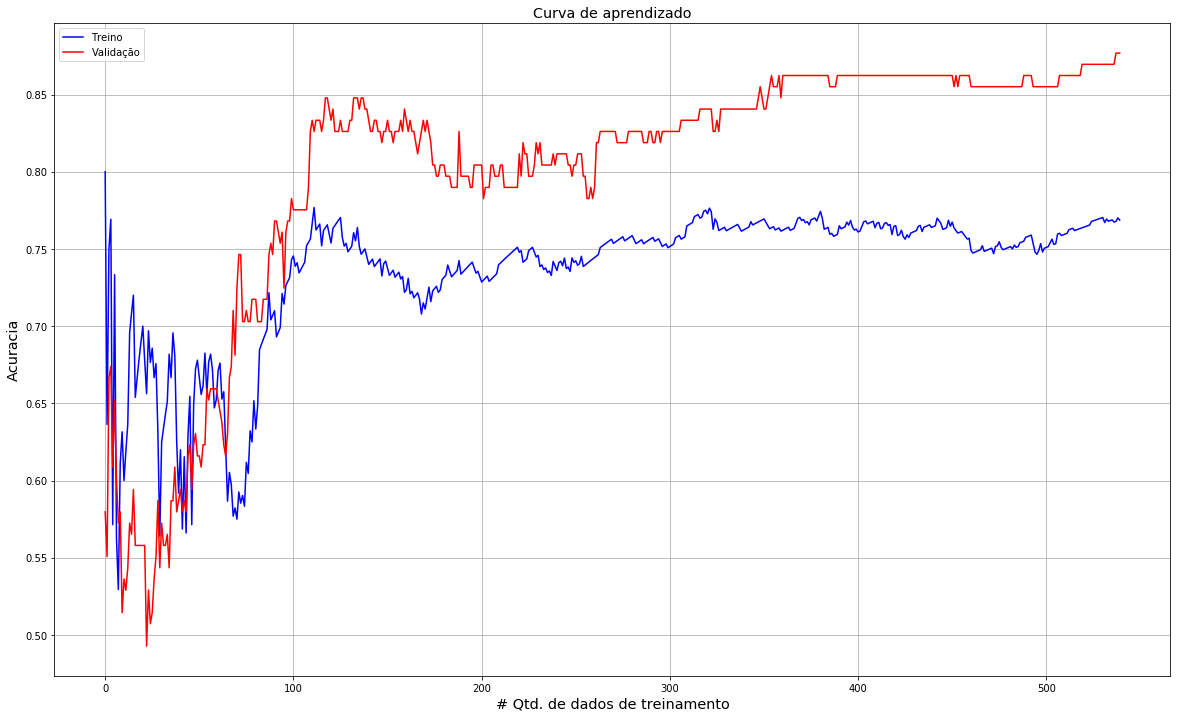

In [19]:
# executa o arquivo que contém a regressao logística
%run logisticRegression.py

def curva_aprendizado(X, Y, Xval, Yval):
    """
    Funcao usada gerar a curva de aprendizado.
  
    Parametros
    ----------
  
    X : matriz com os dados de treinamento
  
    Y : vetor com as classes dos dados de treinamento
  
    Xval : matriz com os dados de validação
  
    Yval : vetor com as classes dos dados de validação
  
    """

    # inicializa as listas que guardarao a performance no treinamento e na validacao
    perf_train = []
    perf_val = []

    # inicializa o parametro de regularizacao da regressao logistica
    lambda_reg = 1
        
    # Configura o numero de interacaoes da regressao logistica
    iteracoes = 500
        
    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instrucoes: Complete o codigo para gerar o gráfico da curva de aprendizado.
    #           Comece o treinamento com as primeiras 10 amostras da base de dados de 
    #           treinamento e calcule a acuracia do classificador tanto nos dados de
    #           treinamento já apresentados, quando na base de validacao. 
    #           Depois disso, adicione mais um dado para treinamento e calcule novamente 
    #           o desempenho. Continue adicionando um dado por vez ate todos os dados de 
    #           treinamento serem usados. Nas listas perf_train e perf_val, guarde a acuracia 
    #           obtida nos dados de treinamento e na base de validacao a cada nova adicao de 
    #           dados para treinamento.
    
    for idx in range(10, len(X)):
        theta = treinamento(X[:idx], Y[:idx], lambda_reg, iteracoes)
        
        predTr = predicao(X[:idx], theta)
        predVal = predicao(Xval, theta)
        
        cmTr = get_confusionMatrix(Y[:idx], predTr, np.unique(np.sort(Y_test)))
        cmVal = get_confusionMatrix(Yval, predVal, np.unique(np.sort(Y_test)))
        
        relTr = relatorioDesempenho(cmTr, np.unique(np.sort(Y_test)))
        relVal = relatorioDesempenho(cmVal, np.unique(np.sort(Y_test)))
        
        perf_val.append(relVal['acuracia'])
        perf_train.append(relTr['acuracia'])
    
    ##################################################################################
       
    # Define o tamanho da figura 
    plt.figure(figsize=(20,12))

    # Plota os dados
    plt.plot(perf_train, color='blue', linestyle='-', linewidth=1.5, label='Treino') 
    plt.plot(perf_val, color='red', linestyle='-', linewidth=1.5, label='Validação')

    # Define os nomes do eixo x e do eixo y
    plt.xlabel(r'# Qtd. de dados de treinamento',fontsize='x-large') 
    plt.ylabel(r'Acuracia',fontsize='x-large') 

    # Define o título do gráfico
    plt.title(r'Curva de aprendizado', fontsize='x-large')

    # Acrescenta um grid no gráfico
    plt.grid(axis='both')

    # Plota a legenda
    plt.legend()
    
    plt.show()


curva_aprendizado(Xpol_train_v, Y_train_v, Xpol_val, Y_val)

### Busca em grade

Para não ter que ficar tentando acertar o melhor parâmetro de regularização na sorte, é recomendado usar uma busca em grade para testar um conjunto de valores (*e.g.*, ${0,0.5,1,10,50,100})$ na predição do conjunto de validação. Posteriormente, o melhor valor encontrado pode ser usado para avaliar o método nos dados de teste.

Você deverá completar a função da busca em grade para encontrar o melhor valor do parâmetro de regularização. Você vai usar o conjunto de validação que já foi gerado.

In [9]:
def gridSearch(X, Y, Xval, Yval):
    """
    Retorna o melhor valor para os parametros lamba da regularizacao da Regressao Logistica.
    
    Parametros
    ----------
    X : matriz com os dados de treinamento
    
    Y : vetor com as classes dos dados de treinamento
    
    Xval : matriz com os dados de validacao
    
    Yval : vetor com as classes dos dados de validacao
    
    Retorno
    -------
    bestReg: o melhor valor para o parametro de regularizacao
    
    """
    
    # inicializa a variável que deverá ser retornada pela função
    bestReg = -100
    
    # valores que deverao ser testados para o parametro de regularizacao 
    reg = [0,0.5,1,10,50,100];
        
    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    # Instrucoes: Complete esta função para retornar os melhores valores do parametro
    #             de regularizacao da regressao Logistica. 
    #
    #             Você pode calcular o desempenho do classificador atraves da funcao
    #             relatorioDesempenho() criada anteriormente. Use a acuracia para decidir
    #             o melhor parametro.            
    #
    lastAcc = -100
    for param in reg:
        theta = treinamento(X, Y, param, iteracoes)
        
        pred = predicao(Xval, theta)
        cm = get_confusionMatrix(Yval, pred, np.unique(np.sort(Y_test)))
        rel = relatorioDesempenho(cm, np.unique(np.sort(Y_test)))
        
        bestReg, lastAcc = (param, rel['acuracia']) if lastAcc < rel['acuracia'] else (bestReg, lastAcc)
    ################################################################################## 

    return bestReg

# chama a função que faz a busca em grade
bestRegularization = gridSearch(Xpol_train_v, Y_train_v, Xpol_val, Y_val)
    
print('\nMelhor parâmetro de regularizacao encontrado: %1.3f' %(bestRegularization))

print('\nO melhor parametro de regualizacao deve ser igual a 0.000')


Melhor parâmetro de regularizacao encontrado: 0.000

O melhor parametro de regualizacao deve ser igual a 0.000


Agora que encontramos o melhor parâmetro de regularização, vamos treinar o método com todos os dados de treinamento e testá-lo com os dados de teste.

In [10]:
# executa o treinamento com o melhor parâmetro de regularização encontrado
theta = treinamento(Xpol_train, Y_train, bestRegularization, iteracoes)
  
# classifica os dados de teste
Y_pred = predicao(Xpol_test, theta)

# gera a matriz de confusão
cm = get_confusionMatrix(Y_test, Y_pred, classes)

# Gera o relatório de desempenho
auxResults = relatorioDesempenho(cm, classes, imprimeRelatorio=True)

print('\n\n\nSe sua implementacao estiver correta, sera gerado o seguinte relatorio de desempenho:\n')
print('\tRevocacao   Precisao   F-medida   Classe')
print('\t0.934       0.899      0.916      0')
print('\t0.917       0.946      0.931      1')
print('\t-------------------------------------------------')
print('\t0.925       0.922      0.924      Media macro')
print('\t0.924       0.924      0.924      Media micro')
print('\n\tAcuracia: 0.924')


	Revocacao   Precisao   F-medida   Classe
	0.934       0.899      0.916      0
	0.917       0.946      0.931      1
	------------------------------------------------
	0.925       0.922      0.924      Média macro
	0.924       0.924      0.924      Média micro

	Acuracia: 0.924



Se sua implementacao estiver correta, sera gerado o seguinte relatorio de desempenho:

	Revocacao   Precisao   F-medida   Classe
	0.934       0.899      0.916      0
	0.917       0.946      0.931      1
	-------------------------------------------------
	0.925       0.922      0.924      Media macro
	0.924       0.924      0.924      Media micro

	Acuracia: 0.924


## Parte 2: K-fold 

A validação cruzada $k$-fold é considerada mais robusta que a validação por *holdout*, pois ela garante que o algoritmo será avaliado com todas as amostras da base de dados.

Para prosseguir com os experimentos com essa nova validação, vamos carregar os dados novamente.

'X:'

array([[0.093318 , 0.649854 ],
       [0.0979263, 0.705409 ],
       [0.15553  , 0.784357 ],
       [0.210829 , 0.866228 ],
       [0.328341 , 0.929094 ]])

Y: [1 1 1 1 1]

Classes:  [0 1]


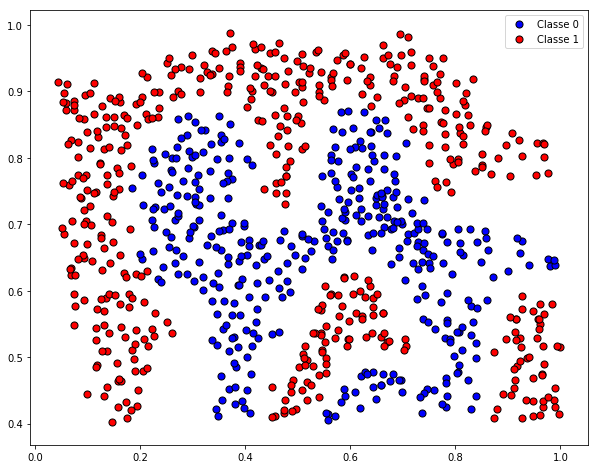

In [11]:
# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

import numpy as np #importa a biblioteca usada para trabalhar com vetores de matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados

# Importa o arquivo e guarda em um dataframe do Pandas
df_dataset3 = pd.read_csv( 'data.csv', sep=',', index_col=None)

# Pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X3 = df_dataset.iloc[:, 0:-1].values 

# Pega os valores da ultima coluna e guarda em um vetor Y
Y3 = df_dataset.iloc[:, -1].values 

# Imprime as 5 primeiras linhas da matriz X
display('X:', X3[0:5,:])

# Imprime os 5 primeiros valores de Y
print('Y:', Y3[0:5])

# obtem e imprimi as classes do problema
classes = np.unique(Y3)
print('\nClasses: ', classes)

# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

#chamando a função que plota os dados   
visualizarDados(X,Y)
plt.show()

Agora, você deverá implementar a validação cruzada *k*-fold estratificada. Na versão estratificada, cada partição deve conter aproximadamente a mesma distribuição original de dados de cada classe. Na sua implementação, você deve dividir os dados em $k$ folds. Para cada rodada $k$, os dados da $k$-ésima partição devem compor os dados de teste, enquanto os dados das outras partições devem compor os dados de treinamento.

In [114]:
def stratified_kfolds(target, k, classes):
    """
    Retorna os indices dos dados de treinamento e teste para cada uma das k rodadas 
    
    Parametros
    ----------   
    target: vetor com as classes dos dados
    
    k: quantidade de folds 
    
    Retorno
    -------
    folds_final: os indices dos dados de treinamento e teste para cada uma das k rodadas 
    
    """

    # Inicializa a variavel que precisa ser retornada. 
    # Cada elemento do vetor folds_final deve ser outro vetor de duas posicoes: a primeira
    #    posicao deve conter um vetor com os indices de treinamento relativos ao i-esimo fold;
    #    a segunda posicao deve conter um vetor com os indices de teste relativos ao i-esimo fold.
    folds_final = np.zeros( k,dtype='object')

    # inicializa o vetor onde o k-esimo elemento guarda os indices dos dados de treinamento 
    # relativos ao k-esimo fold 
    train_index = np.zeros( k,dtype='object')
    
    # inicializa o vetor onde o k-esimo elemento guarda os indices dos dados de teste 
    # relativos ao k-esimo fold 
    test_index = np.zeros( k,dtype='object')
    
    # inicializa cada posicao do vetor folds_final que devera ser retornado pela funcao
    for i in folds_final:
        
        train_index[i] = [] # indices dos dados de treinamento relativos ao fold i
        test_index[i] = [] # indices dos dados de teste relativos ao fold i
        
        # inicializa o i-esimo elemento do vetor que devera ser retornado
        folds_final[i] = np.array( [train_index[i],test_index[i]] ) 
      
    

    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instrucoes: Complete o codigo para retornar os indices dos dados de  
    #              treinamento e dos dados de teste para cada rodada do k-folds.
    #              
    #              Obs: - os conjuntos de treinamento e teste devem ser criados
    #                     de maneira estratificada, ou seja, deve ser mantida a 
    #                     a proporcao original dos dados de cada classe em cada 
    #                     conjunto.
    #                   - Para cada rodada k, os dados da k-esima particao devem compor 
    #                     os dados de teste, enquanto os dados das outras particoes devem 
    #                     compor os dados de treinamento.
    #                   - voce devera retornar a variavel folds_final: essa variavel e uma 
    #                     vetor de k posicoes. Cada posicao k do vetor folds_final deve conter 
    #                     outro vetor de duas posicoes: a primeira posicao deve conter um vetor 
    #                     com os indices de treinamento relativos ao k-esimo fold; a segunda posicao 
    #                     deve conter um vetor com os indices de teste relativos ao k-esimo fold. 
    
    percPerClass = [len(np.where(target == classe)[0]) / len(target) for classe in classes]
    qtyElemPerK = len(target) / k
    qtyElemPerClass = [qtyElemPerK * perc for perc in percPerClass]
    folders = [[] for i in range(k)]
    
    for idx, classe in enumerate(classes):
        qty = int(qtyElemPerClass[idx])
        for nfolder in range(0, k):
            folders[nfolder] += np.where(classe == target)[0][nfolder * qty : (nfolder * qty) + qty].tolist()
            
    folders = [sorted(nfolder) for nfolder in folders]
    
    for idxff, fold_final in enumerate(folds_final):
        train_index = []
        test_index = []
        for idxf, folder in enumerate(folders):
            if idxf == idxff:
                test_index = folder
            else:
                train_index += folder
        
        folds_final[idxff] = np.array([train_index, test_index])
    
    ##################################################################################
    
    return folds_final
    

É importante que as $k$ partições sejam geradas de forma aleatória. Portanto, no script abaixo, antes de chamarmos a função que gera os $k$ conjuntos de treinamento e teste, iremos embaralhar os dados. Para que toda a execução gere o mesmo resultado, vamos usar uma semente para a função de geração de números aleatórios. 

In [115]:
# semente usada na randomizacao dos dados.
randomSeed = 10 

# gera os indices aleatorios que irao definir a ordem dos dados
idx_perm = np.random.RandomState(randomSeed).permutation(range(len(Y3)))

# ordena os dados de acordo com os indices gerados aleatoriamente
X4, Y4 = X3[idx_perm, :], Y3[idx_perm]

# separa os dados em k folds
nFolds = 5
folds = stratified_kfolds(Y4, nFolds, classes) 

k = 1
for train_index, test_index in folds:

    print('\n-----------\n%d-fold: \n-----------\n' % (k) )

    # se train_index ou test_index forem vazios, interrompe o laco de repeticao
    if len(train_index)==0 or len(test_index)==0: 
        print('\tErro: o vetor com os indices de treinamento ou o vetor com os indices de teste esta vazio')      
        break
        
    X_train, X_test = X4[train_index, :], X4[test_index, :];
    Y_train, Y_test = Y4[train_index], Y4[test_index];

    print('\tQtd. dados de treinamento: %d (%1.2f%%)' %(X_train.shape[0], (X_train.shape[0]/X.shape[0])*100) )
    print('\tQtd. de dados de teste: %d (%1.2f%%)' %(X_test.shape[0], (X_test.shape[0]/X.shape[0])*100) )

    # imprime a porcentagem de dados de treinamento de cada classe
    print("\n\tQtd. de dados de cada classe (treinamento)")
    cTrain, counts_cTrain = np.unique(np.sort(Y_train), return_counts=True)
    for i in range( len(cTrain) ):
        print('\t\tClasse %s: %d (%1.2f%%)' %( cTrain[i],counts_cTrain[i],(counts_cTrain[i]/len(Y_train))*100 ) )

    # imprime a porcetagem de dados de teste de cada classe
    print("\n\tQtd. de dados de cada classe (teste)")
    cTest, counts_cTest = np.unique(np.sort(Y_test), return_counts=True)
    for i in range( len(cTrain) ):
        print('\t\tClasse %s: %d (%1.2f%%)' %( cTest[i],counts_cTest[i],(counts_cTest[i]/len(Y_test))*100 ) )

    k = k + 1

    
print('\n\n\n'+"-"*80+'\nSe sua implementacao estiver corretas, cada uma das 5 rodadas deve conter:')
print('\t- 304 dados de treinamento da classe 0 (44.19%)')
print('\t- 384 dados de treinamento da classe 1 (55.81%)')

print('\nSe sua implementacao estiver correta, cada fold deve conter:')
print('\t- 76 dados de teste da classe 0 (44.19%)')
print('\t- 96 dados de teste da classe 1 (55.81%)')


-----------
1-fold: 
-----------

	Qtd. dados de treinamento: 688 (80.00%)
	Qtd. de dados de teste: 172 (20.00%)

	Qtd. de dados de cada classe (treinamento)
		Classe 0: 304 (44.19%)
		Classe 1: 384 (55.81%)

	Qtd. de dados de cada classe (teste)
		Classe 0: 76 (44.19%)
		Classe 1: 96 (55.81%)

-----------
2-fold: 
-----------

	Qtd. dados de treinamento: 688 (80.00%)
	Qtd. de dados de teste: 172 (20.00%)

	Qtd. de dados de cada classe (treinamento)
		Classe 0: 304 (44.19%)
		Classe 1: 384 (55.81%)

	Qtd. de dados de cada classe (teste)
		Classe 0: 76 (44.19%)
		Classe 1: 96 (55.81%)

-----------
3-fold: 
-----------

	Qtd. dados de treinamento: 688 (80.00%)
	Qtd. de dados de teste: 172 (20.00%)

	Qtd. de dados de cada classe (treinamento)
		Classe 0: 304 (44.19%)
		Classe 1: 384 (55.81%)

	Qtd. de dados de cada classe (teste)
		Classe 0: 76 (44.19%)
		Classe 1: 96 (55.81%)

-----------
4-fold: 
-----------

	Qtd. dados de treinamento: 688 (80.00%)
	Qtd. de dados de teste: 172 (20.00%

Agora que separamos os dados em partições, vamos executar o algoritmo em cada *fold* gerado e calcular o resultado. Em cada *fold*, deve ser usada a busca em grade para encontrar o melhor parâmetro de regularização. Além disso, como os dados não são linearmente separáveis, iremos gerar atributos polinomiais antes de executar o treinamento e teste.

In [116]:
#executa o arquivo que contém as função da regressao logística
%run logisticRegression.py
    
# inicializa o parametro que defini o numero de iteracoes da regressão logística
iteracoes = 1000

k = 1
resultados=[] # cria uma lista vazia para guardar os resultados obtidos em cada fold

for train_index, test_index in folds:
    print('\n-----------\n%d-fold: \n-----------\n' % (k) )

    # se train_index ou test_index forem vazios, interrompe o laco de repeticao
    if len(train_index)==0 or len(test_index)==0: 
        print('\tErro: o vetor com os indices de treinamento ou o vetor com os indices de teste esta vazio')      
        break
        
    totalFold = len(train_index)+len(test_index)

    X_train, X_test = X4[train_index, :], X4[test_index, :];
    Y_train, Y_test = Y4[train_index], Y4[test_index];

    # adiciona novas colunas que correspondem a atributos polinomiais
    Xpol_train = atributosPolinomiais(X_train[:,0],X_train[:,1]) 
    Xpol_test = atributosPolinomiais(X_test[:,0],X_test[:,1]) 
    
    # separa os dados de treinamento em treinamento e validacao
    pTrain = 0.8
    train_index_v, val_index = stratified_holdOut(Y_train, pTrain)

    Xpol_train_v, Xpol_val = Xpol_train[train_index_v, :], Xpol_train[val_index, :]
    Y_train_v, Y_val = Y_train[train_index_v], Y_train[val_index]

    # chama a função que faz a busca em grade
    bestRegularization = gridSearch(Xpol_train_v, Y_train_v, Xpol_val, Y_val)

    # executa o treinamento com o melhor parâmetro de regularização encontrado
    theta = treinamento(Xpol_train, Y_train, bestRegularization, iteracoes)

    # classifica os dados de teste
    Y_pred = predicao(Xpol_test, theta)

    # Compute confusion matrix
    cm = get_confusionMatrix(Y_test, Y_pred, classes)

    # Gera o relatório de desempenho
    print('\n\n\n\t'+"="*50+'\n\tMelhor parametro de regularizacao: %1.6f' %bestRegularization)
    print('\n\tResultado no fold atual usando o melhor parametro encontrado:')
    auxResults = relatorioDesempenho(cm, classes, imprimeRelatorio=True)

    # adiciona os resultados do fold atual na lista de resultados
    resultados.append( auxResults ) 
        
    k+=1
    
    


-----------
1-fold: 
-----------




	Melhor parametro de regularizacao: 0.000000

	Resultado no fold atual usando o melhor parametro encontrado:

	Revocacao   Precisao   F-medida   Classe
	0.895       0.872      0.883      0
	0.896       0.915      0.905      1
	------------------------------------------------
	0.895       0.893      0.894      Média macro
	0.895       0.895      0.895      Média micro

	Acuracia: 0.895

-----------
2-fold: 
-----------




	Melhor parametro de regularizacao: 0.000000

	Resultado no fold atual usando o melhor parametro encontrado:

	Revocacao   Precisao   F-medida   Classe
	0.868       0.880      0.874      0
	0.906       0.897      0.902      1
	------------------------------------------------
	0.887       0.888      0.888      Média macro
	0.890       0.890      0.890      Média micro

	Acuracia: 0.890

-----------
3-fold: 
-----------




	Melhor parametro de regularizacao: 0.000000

	Resultado no fold atual usando o melhor parametro encontrado:



Agora, precisamos calcular o desempenho final do algoritmo. Para isso, basta calcular a média dos resultados obtidos em cada fold.

In [117]:
def mediaFolds( resultados, classes ):
    
    nClasses = len(classes)
    
    acuracia = np.zeros( len(resultados) )

    revocacao = np.zeros( [len(resultados),len(classes)] )
    precisao = np.zeros( [len(resultados),len(classes)] )
    fmedida = np.zeros( [len(resultados),len(classes)] )

    revocacao_macroAverage = np.zeros( len(resultados) )
    precisao_macroAverage = np.zeros( len(resultados) )
    fmedida_macroAverage = np.zeros( len(resultados) )

    revocacao_microAverage = np.zeros( len(resultados) )
    precisao_microAverage = np.zeros( len(resultados) )
    fmedida_microAverage = np.zeros( len(resultados) )


    for i in range(len(resultados)):
        acuracia[i] = resultados[i]['acuracia']
        
        revocacao[i,:] = resultados[i]['revocacao']
        precisao[i,:] = resultados[i]['precisao']
        fmedida[i,:] = resultados[i]['fmedida']

        revocacao_macroAverage[i] = resultados[i]['revocacao_macroAverage']
        precisao_macroAverage[i] = resultados[i]['precisao_macroAverage']
        fmedida_macroAverage[i] = resultados[i]['fmedida_macroAverage']

        revocacao_microAverage[i] = resultados[i]['revocacao_microAverage']
        precisao_microAverage[i] = resultados[i]['precisao_microAverage']
        fmedida_microAverage[i] = resultados[i]['fmedida_microAverage']
        
    # imprimindo os resultados para cada classe
    print('\n\tRevocacao   Precisao   F-medida   Classe')
    for i in range(0,nClasses):
        print('\t%1.3f       %1.3f      %1.3f      %s' % (np.mean(revocacao[:,i]), np.mean(precisao[:,i]), np.mean(fmedida[:,i]), classes[i] ) )

    print('\t---------------------------------------------------------------------')
  
    #imprime as medias
    print('\t%1.3f       %1.3f      %1.3f      Média macro' % (np.mean(revocacao_macroAverage), np.mean(precisao_macroAverage), np.mean(fmedida_macroAverage)) )
    print('\t%1.3f       %1.3f      %1.3f      Média micro\n' % (np.mean(revocacao_microAverage), np.mean(precisao_microAverage), np.mean(fmedida_microAverage)) )

    print('\tAcuracia: %1.3f' %np.mean(acuracia))
    

# imprime a media dos folds
print('\nResultado final da classificação:')
mediaFolds( resultados, classes )

print('\n\n\nSe sua implementacao estiver correta, sera gerado o seguinte relatorio:\n')
print('\tRevocacao   Precisao   F-medida   Classe')
print('\t0.913       0.894      0.904      0')
print('\t0.915       0.930      0.922      1')
print('\t-------------------------------------------------')
print('\t0.914       0.912      0.913      Media macro')
print('\t0.914       0.914      0.914      Media micro')
print('\n\tAcuracia: 0.914')



Resultado final da classificação:

	Revocacao   Precisao   F-medida   Classe
	0.913       0.894      0.904      0
	0.915       0.930      0.922      1
	---------------------------------------------------------------------
	0.914       0.912      0.913      Média macro
	0.914       0.914      0.914      Média micro

	Acuracia: 0.914



Se sua implementacao estiver correta, sera gerado o seguinte relatorio:

	Revocacao   Precisao   F-medida   Classe
	0.913       0.894      0.904      0
	0.915       0.930      0.922      1
	-------------------------------------------------
	0.914       0.912      0.913      Media macro
	0.914       0.914      0.914      Media micro

	Acuracia: 0.914
